In [19]:
import numpy as np
import control
import control.matlab
import math            
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import step_info, step_info_theoretical, plot_responses, errors

from pprint import pprint

In [20]:
# dorf ExamplE 13.9, pg 937

In [46]:
T = 0.001
# função de transferência da planta
Gz = control.tf([1, 1], [1, -2, 1],T);
Gz

TransferFunction(array([1, 1]), array([ 1, -2,  1]), 0.001)

In [48]:
x, y = control.step_response(Gz)

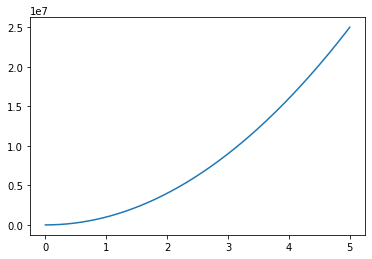

In [51]:
plt.plot(x, y)

In [52]:
alpha = 1
beta = 0.2

In [53]:
Gdz = control.tf([1, 1], [1, -1.2, 0.2], T)
Gdz

TransferFunction(array([1, 1]), array([ 1. , -1.2,  0.2]), 0.001)

In [54]:
# Identificar o ganho crítico
FTMA = Gdz*Gz
k = np.linspace(0.01,1,5000);
j = 0;
maior_polo = 0;
while (maior_polo <= 1):
    FTMF = control.feedback(k[j]*FTMA,1)
    polos = control.pole(FTMF);
    maior_polo = max(abs(polos));
    Kcritico = k[j];
    j = j+1;
Kcritico

0.01

In [44]:
FTMA = Gdz*Gz*Kcritico
FTMF = control.feedback(FTMA, 1)
FTMF = control.minreal(FTMF)
FTMF

0 states have been removed from the model


TransferFunction(array([ 1.00150083e-05,  1.00100058e-08, -1.00049983e-05]), array([ 1.        , -3.202001  ,  3.60441322, -1.60280259,  0.2003904 ]), 0.001)

{'Mp': 97.35647632816004,
 'tp': 34.768,
 'ts5': 34.994,
 'ts2': 34.997,
 'tr': 0.679,
 'td': 34.364}

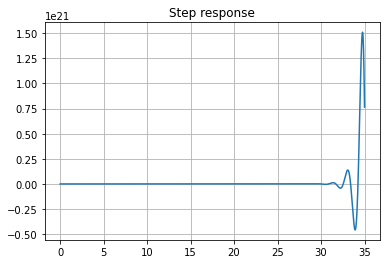

In [39]:
step_info(FTMF, 35, plot=True)   

(-1.0, 1.0)

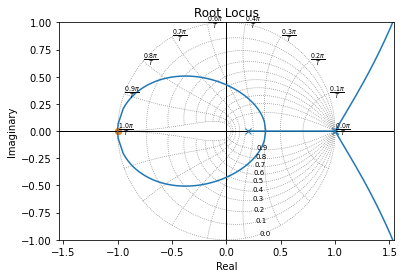

In [55]:
l = 1
control.root_locus(FTMA)
axes = plt.gca()
axes.set_xlim([-l, l])
axes.set_ylim([-l, l])